<a href="https://colab.research.google.com/github/Mahdidrv/face-detection/blob/main/Facial_Landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import urllib.request as urlreq
import os
import matplotlib.pyplot as plt
from pylab import rcParams

In [ ]:
pics_url = "https://static.wikia.nocookie.net/e27ce036-1a4a-46c9-877e-e02392ee656c"
pic = "image.jpg"
if(pic in os.listdir(os.curdir)):
    print("Pictures exists")
    os.remove("image.jpg")
    print("removed...")
    urlreq.urlretrieve(pics_url, pic)
    print("picture downloaded")
else:
    urlreq.urlretrieve(pics_url, pic)
    print("picture downloaded")

In [ ]:
image = cv2.imread(pic)
plt.imshow(image)
print (image)

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [ ]:
#x,y,width,depth = 50, 300, 800, 600
#image_cropped = image_rgb[y:(y+depth), x: (x+width)]
image_cropped = image_rgb
image_template = image_cropped.copy()

In [ ]:
rcParams['figure.figsize'] = 10,15
plt.imshow(image_cropped)

In [ ]:
gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"
haarcascade = "frontface.xml"
if(haarcascade in os.listdir(os.curdir)):
    print("file exists")
else:
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("file downloaded")

In [ ]:
detector = cv2.CascadeClassifier(haarcascade)
faces = detector.detectMultiScale(gray)
print("faces:\n ", faces)

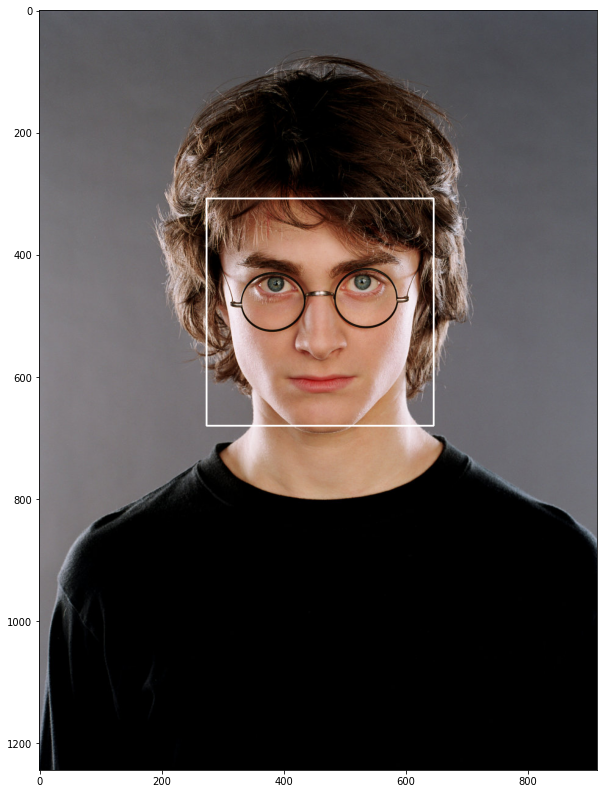

In [ ]:
for face in faces:
    (x,y,w,d) = face
    cv2.rectangle(image_template,(x,y),(x+w, y+d), (255,255,255),2)
    plt.imshow(image_template)

In [ ]:
LBFmodel_url = "https://raw.githubusercontent.com/kurnianggoro/GSOC2017/master/data/lbfmodel.yaml"
LBFmodel = "LFBmodel.yaml"
if(LBFmodel in os.listdir(os.curdir)):
    print("file exists")
else:
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("file downloaded")

In [ ]:

landmark_detector = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)
_,landmarks = landmark_detector.fit(gray, faces)
print("landmarks", landmarks)


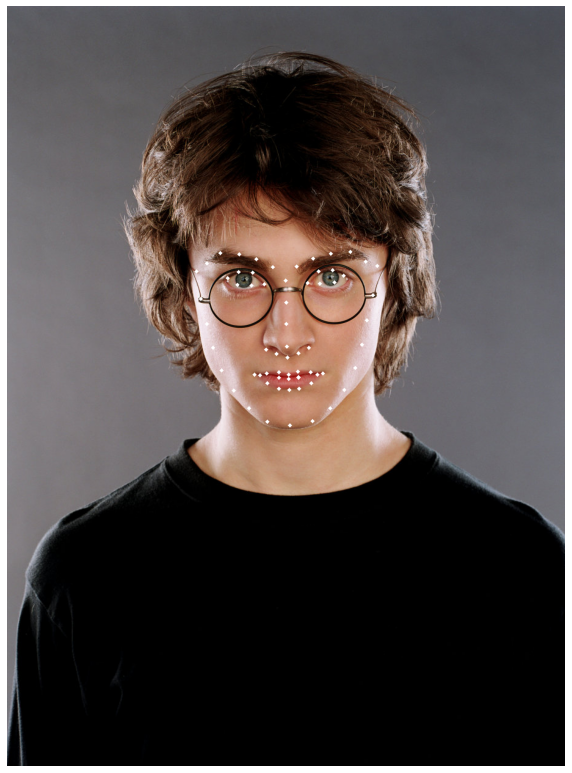

In [ ]:
for landmark in landmarks:
  for x,y in landmark[0]:
    cv2.circle(image_cropped,(x,y),1,(255,255,255),3)
    plt.axis("off")
    plt.imshow(image_cropped)